In [1]:

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz 점들이 1초동안 얼마나 많이 나오는가
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz. shape이 얼마나 많이 나오는가. 


In [3]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [4]:
# generate phase
theta = t * 2*np.pi * freq

In [5]:
# generate signal by cosine-phasor
s = amp*np.cos(theta)

Text(0,0.5,'real')

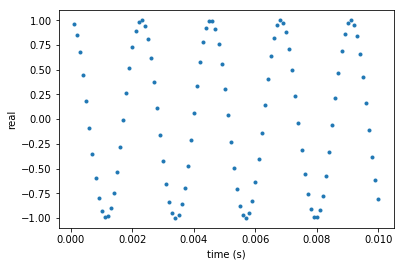

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [7]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

Text(0.5,0,'imag')

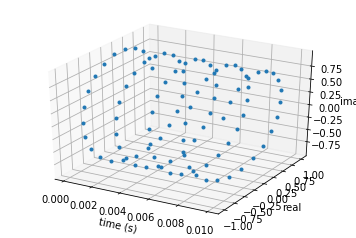

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [9]:
#!pip install sounddevice
import sounddevice as sd
sd.play(c.real, sr)

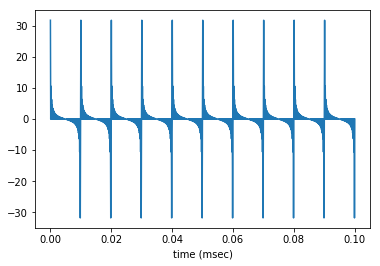

In [21]:
#최소의 harmonincs와 frequency를 잡는다. f0를 정하고 sine wave를 만들고 배음을 정한다. 
# generate samples, note conversion to float32 array . sr을 무엇으로 하느냐에 따라 frequency를 몇까지 올릴 수 있는지 정해짐.
f0 = 100; Fend= int(sr/2); s = np. zeros(len(t))
for freq in range (f0, Fend+1, f0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s= s+ tmp #처음 s에다가 더하고 더하고 함.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
import sounddevice as sd
sd.play(c.real, sr)

In [18]:
print (s)

[ 3.18205160e+01 -3.00440511e-16  1.05788950e+01 ...  7.38341306e-13
 -3.18205160e+01 -1.84137851e-11]


In [11]:
#한 타임에 있는 주파수를 보여주는게 spectrum
def hz2w (F, sr): #function 만드는 과정. 이름.
    NyFreq = sr/2;
    w=F/NyFreq * np.pi; #입력으로 두개 들어감.
    return w #return=출력

def resonance (srate, F, BW):
    a2 = np. exp(-hz2w(BW, srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a= np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [12]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator. width는 산맥이 뾰족하냐 아니냐. width 크면 펴짐. 작으면, 좁아짐.
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#gradually decreasing 하는 것을 만든다.

In [13]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#첫번째 산맥

In [14]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [15]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)